In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\komar\Downloads\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

rename race/ethnicity to ethnicity

In [4]:
df.rename(columns={'race/ethnicity':'ethnicity'},inplace=True)
df.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


remove spaces in column names

In [5]:
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['gender', 'ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [6]:
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


clean null values if present

In [7]:
df.isna().sum()

gender                         0
ethnicity                      0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.dropna()
df

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


explore unique values in catagorical columns


In [9]:
df[['gender','ethnicity','parental_level_of_education','lunch','test_preparation_course']].apply(lambda x:x.unique())

gender                                                            [female, male]
ethnicity                          [group B, group C, group A, group D, group E]
parental_level_of_education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test_preparation_course                                        [none, completed]
dtype: object

fix dtypes of the columns if needed

In [10]:
df.dtypes

gender                         object
ethnicity                      object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

replace 'none' to 'not completed' in `test preration cource`

In [11]:
df.test_preparation_course.replace('none','not completed',inplace=True)
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75


check duplicate rows

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,not completed,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,not completed,90,95,93
3,male,group A,associate's degree,free/reduced,not completed,47,57,44
4,male,group C,some college,standard,not completed,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,not completed,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


add new column called `division` which gives studet 'first', 'second', 'third' or fail according to total marks.

In [14]:
df['total_marks']=df.apply(lambda x : x["math_score"]+x['reading_score']+x['writing_score'],axis=1)
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,not completed,90,95,93,278
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148
4,male,group C,some college,standard,not completed,76,78,75,229


In [15]:
df['division']=df.total_marks.apply(lambda x:'first division' if x >=180 else ('second division' if 150<=x>=179 else('third divison' if 90>=x<=149 else "fail")))
df.head()

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,division
0,female,group B,bachelor's degree,standard,not completed,72,72,74,218,first division
1,female,group C,some college,standard,completed,69,90,88,247,first division
2,female,group B,master's degree,standard,not completed,90,95,93,278,first division
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,148,fail
4,male,group C,some college,standard,not completed,76,78,75,229,first division


EDA

Average marks of a student in all 3 subjects.

In [16]:
df.total_marks.mean()

203.312

Which student got the highest marks in total?

In [17]:
df.loc[df["total_marks"].idxmax()]

gender                                    female
ethnicity                                group E
parental_level_of_education    bachelor's degree
lunch                                   standard
test_preparation_course            not completed
math_score                                   100
reading_score                                100
writing_score                                100
total_marks                                  300
division                          first division
Name: 458, dtype: object

In [18]:
df.loc[df["total_marks"].idxmin()]

gender                                   female
ethnicity                               group C
parental_level_of_education    some high school
lunch                              free/reduced
test_preparation_course           not completed
math_score                                    0
reading_score                                17
writing_score                                10
total_marks                                  27
division                          third divison
Name: 59, dtype: object

What is the average score of students in each subjects? hint: #make box plot of each subject


In [19]:
df1=pd.melt(frame=df, value_vars=['math_score','reading_score', 'writing_score'],var_name='subjects',value_name='scores')
df1

,subjects,scores
0,math_score,72
1,math_score,69
2,math_score,90
3,math_score,47
4,math_score,76
...,...,...
2995,writing_score,95
2996,writing_score,55
2997,writing_score,65
2998,writing_score,77


<AxesSubplot:xlabel='subjects', ylabel='scores'>

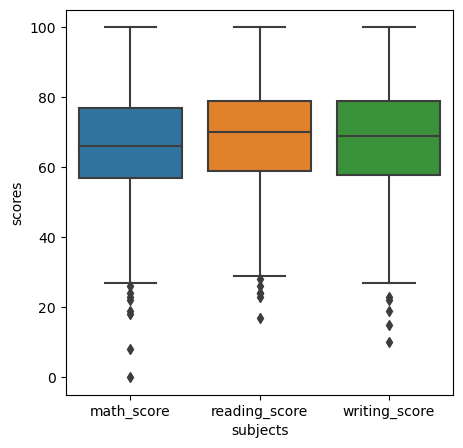

In [20]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df1.subjects, y=df1.scores)

Ratio of Male and Female students. hint: #pie chart

In [21]:
df2=df.gender.value_counts()
df2

female    518
male      482
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x21bad514fa0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51%'),
  Text(0.033911133252536786, -0.5990409293541875, '48%')])

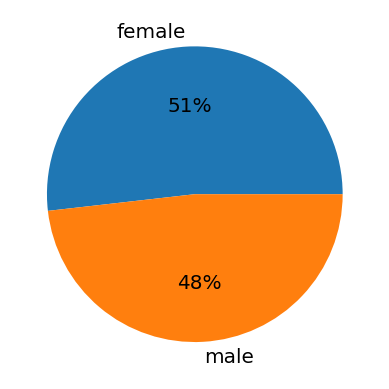

In [22]:
plt.pie(x=df2,labels=df2.index,autopct='%d%%',textprops={'size':'x-large'})

Ratio of ethnicity of students. hint: # pie chart

In [23]:
df3=df.ethnicity.value_counts()
df3

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

([<matplotlib.patches.Wedge at 0x21bad6b3910>,
 [Text(0.592324332246979, 0.9269044640242977, 'group C'),
  Text(-1.0461621742897658, 0.3399186742226879, 'group D'),
  Text(-0.49322154359063347, -0.9832255636109514, 'group B'),
  Text(0.5952333666001212, -0.9250390474384775, 'group E'),
  Text(1.057281962489778, -0.3035701760610943, 'group A')],
 [Text(0.3230859994074431, 0.5055842531041623, '31%'),
  Text(-0.5706339132489631, 0.18541018593964795, '26%'),
  Text(-0.2690299328676182, -0.5363048528787007, '18%'),
  Text(0.32467274541824787, -0.5045667531482604, '14%'),
  Text(0.5766992522671516, -0.1655837323969605, '8%')])

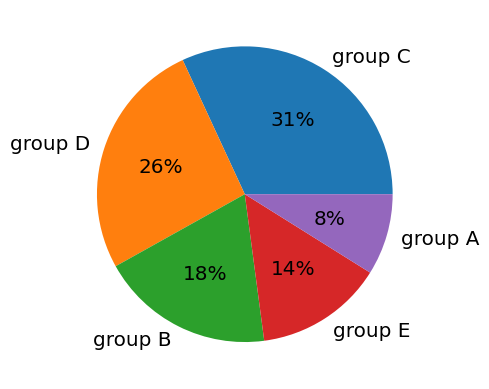

In [24]:
plt.pie(x=df3,labels=df3.index,autopct='%d%%',textprops={'size':'x-large'})

On an average which group performed the best in total marks? hint: group by then pivot table (col = gen, index= eth, val = total)

In [25]:
pivot_table = df.pivot_table(index="ethnicity", columns="gender", values="total_marks", aggfunc="mean")
pivot_table

gender,female,male
ethnicity,,
group A,195.388889,184.622642
group B,202.528846,189.000000
group C,205.755556,195.748201
group D,214.317829,200.962406
group E,222.188406,214.436620


 Which gender perfomed better overall? hint: #bar plot

<AxesSubplot:xlabel='gender', ylabel='total_marks'>

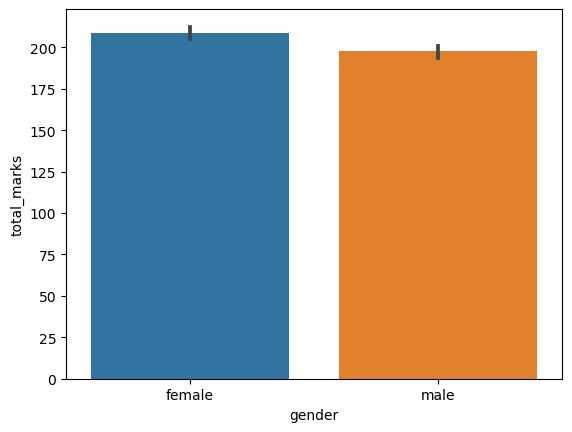

In [26]:
sns.barplot(data=df,x='gender',y='total_marks')

Which gender performed better in each group?  hint: #bar

<AxesSubplot:xlabel='ethnicity', ylabel='total_marks'>

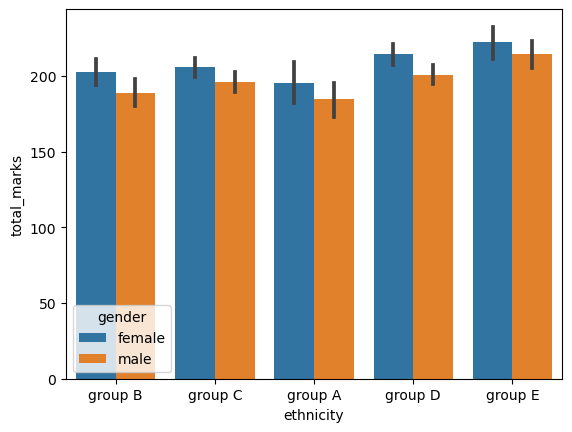

In [27]:
sns.barplot(data=df,x='ethnicity',y='total_marks',hue='gender')

How many students have failed and which group have the most?

In [28]:
df4=df[df.division=='Fail']
df4.ethnicity.value_counts()

Series([], Name: ethnicity, dtype: int64)

Students got more marks than others whose parents have higer education degree?

Text(0.5, 1.0, 'students got more marks than others whose parents have higer education degree')

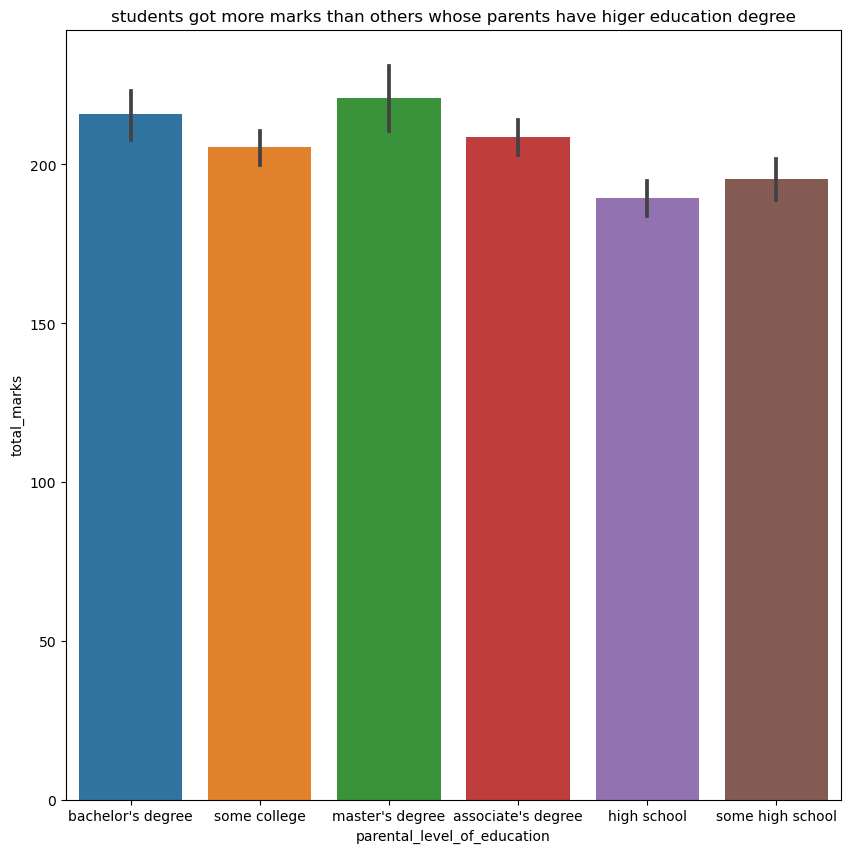

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='parental_level_of_education', y='total_marks')
plt.title("students got more marks than others whose parents have higer education degree")

Those students whose completed their course got more grades in compare to those student who didn't?

In [34]:
df5=df.test_preparation_course.value_counts()
df5

not completed    642
completed        358
Name: test_preparation_course, dtype: int64

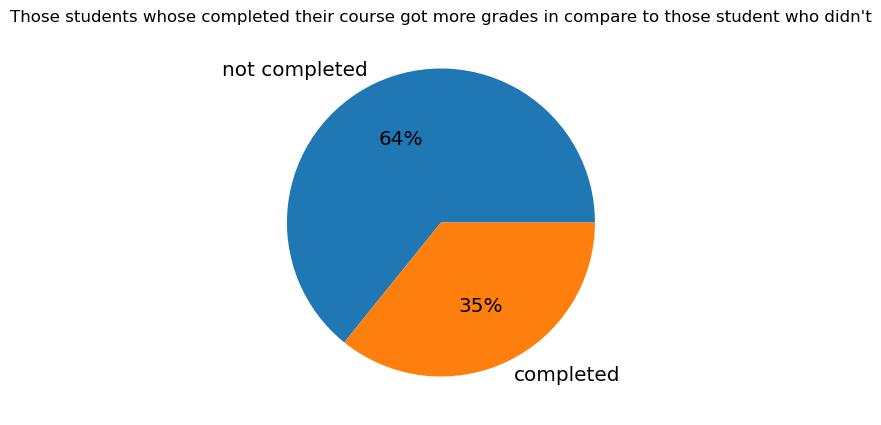

In [35]:
plt.figure(figsize=(5,5))
plt.pie(x=df5,labels=df5.index,autopct='%d%%',textprops={'size':'x-large'})
plt.title("Those students whose completed their course got more grades in compare to those student who didn't")
plt.show()